In [2]:
# Python program to create 
# Image Classifier using CNN 
  
# Importing the required libraries 
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm

ModuleNotFoundError: No module named 'cv2'

In [28]:
'''Setting up the env'''
  
TRAIN_DIR = 'D:/dogs-vs-cats/train/train'
TEST_DIR = 'D:/dogs-vs-cats/test1'
IMG_SIZE = 50
LR = 1e-3

In [29]:
'''Setting up the model which will help with tensorflow models'''
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic') 

In [30]:
'''Labelling the dataset'''
def label_img(img): 
    word_label = img.split('.')[-3] 
    # DIY One hot encoder 
    if word_label == 'cat': return [1, 0] 
    elif word_label == 'dog': return [0, 1] 

In [31]:
'''Creating the training data'''
def create_train_data(): 
    # Creating an empty list where we should store the training data  
    training_data = [] 
    # tqdm is only used for interactive loading 
    # loading the training data 
    for img in tqdm(os.listdir(TRAIN_DIR)): 
  
        # labeling the images 
        label = label_img(img) 
  
        path = os.path.join(TRAIN_DIR, img) 
  
        # loading the image from the path and then converting them into
        # greyscale for easier covnet prob 
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
  
        # resizing the image for processing them in the covnet 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
  
        # final step-forming the training data list with numpy array of the images 
        training_data.append([np.array(img), np.array(label)]) 
  
    # shuffling of the training data to preserve the random state of our data 
    shuffle(training_data) 
  
    # saving our trained data for further uses if required 
    np.save('train_data.npy', training_data) 
    return training_data 

In [32]:
'''Processing the given test data'''
# Almost same as processing the training data but 
# we dont have to label it. 
def process_test_data(): 
    testing_data = [] 
    for img in tqdm(os.listdir(TEST_DIR)): 
        path = os.path.join(TEST_DIR, img) 
        img_num = img.split('.')[0] 
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
        testing_data.append([np.array(img), img_num]) 
          
    shuffle(testing_data) 
    np.save('test_data.npy', testing_data) 
    return testing_data 

In [33]:
'''Running the training and the testing in the dataset for our model'''
train_data = create_train_data() 


100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [08:11<00:00, 50.86it/s]


In [17]:
# Importing the required libraries 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 
import tensorflow as tf

In [9]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 2, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [10]:
# Splitting the testing data and training data 
train = train_data[:-500] 
test = train_data[-500:] 

In [11]:
'''Setting up the features and lables'''
# X-Features & Y-Labels 
  
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
test_y = [i[1] for i in test] 

In [26]:
'''Fitting the data into our model'''
# epoch = 5 taken 
model.fit({'input': X}, {'targets': Y}, n_epoch = 5,  
    validation_set =({'input': test_x}, {'targets': test_y}),  
    snapshot_step = 500, show_metric = True, run_id = MODEL_NAME) 
model.save(MODEL_NAME)

Training Step: 7659  | total loss: 0.18326 | time: 78.705s
| Adam | epoch: 020 | loss: 0.18326 - acc: 0.9294 -- iter: 24448/24500
Training Step: 7660  | total loss: 0.18269 | time: 79.911s
| Adam | epoch: 020 | loss: 0.18269 - acc: 0.9271 | val_loss: 0.69500 - val_acc: 0.7800 -- iter: 24500/24500
--
INFO:tensorflow:C:\Users\sujata raut\dogsvscats-0.001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [22]:
'''Testing the data'''
import matplotlib.pyplot as plt 
# if you need to create the data: 
test_data = process_test_data() 
# if you already have some saved: 
test_data = np.load('test_data.npy',allow_pickle=True)  

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:30<00:00, 405.35it/s]


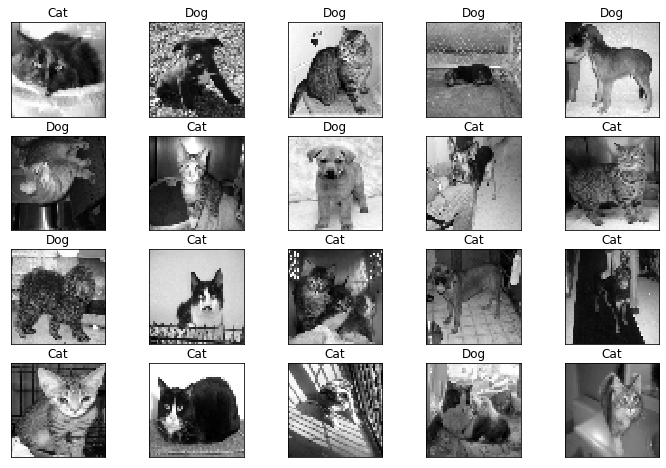

In [25]:
fig = plt.figure(figsize=(12,8)) 
  
for num, data in enumerate(test_data[:20]): 
    cat: [1, 0] 
    dog: [0, 1] 
      
    img_num = data[1] 
    img_data = data[0] 
      
    y = fig.add_subplot(4, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 
  
    # model_out = model.predict([data])[0] 
    model_out = model.predict([data])[0] 
 
    if np.argmax(model_out) == 1: str_label ='Dog'
    else: str_label ='Cat'

    y.imshow(orig, cmap ='gray') 
    plt.title(str_label) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
plt.show() 